In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np


In [2]:
df=pd.read_csv("E:/datasets/BostonHousing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#check for multicollinearity
c=df.corr()

In [5]:
c

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [6]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


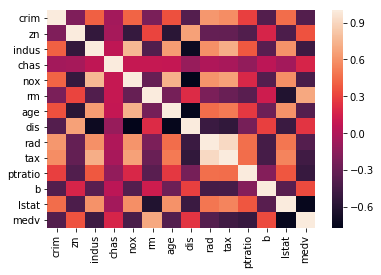

In [8]:
sns.heatmap(c)

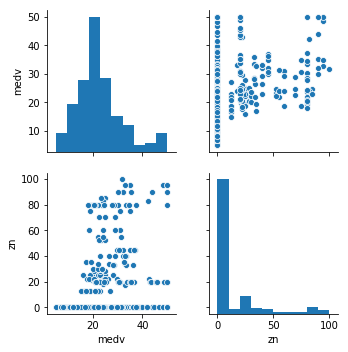

In [13]:
#to find the linear independent values
sns.pairplot(df.iloc[:,[-1,1]])

In [16]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv', 'logzn'],
      dtype='object')

In [22]:
# doing a log transformation to normalize values
df['logcrim']=df['crim'].map(np.log)

In [23]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,logcrim
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,-5.064036
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,-3.600502
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,-3.601235
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,-3.430523
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,-2.672924


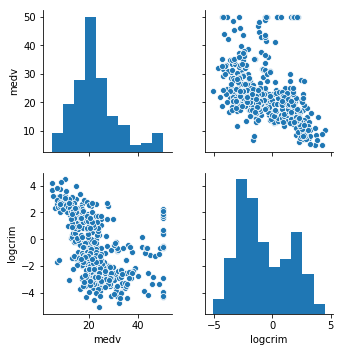

In [24]:
sns.pairplot(df.iloc[:,[-2,-1]])

In [20]:
df.drop(['logzn'],axis=1,inplace=True)

In [25]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv', 'logcrim'],
      dtype='object')

In [28]:
X=df.iloc[:,[2,3,4,5,6,7,8,10,11,12,14]]
Y=df.iloc[:,-2]

In [29]:
X

,indus,chas,nox,rm,age,dis,rad,ptratio,b,lstat,logcrim
0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,-5.064036
1,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,-3.600502
2,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,-3.601235
3,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,-3.430523
4,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,-2.672924
5,2.18,0,0.458,6.430,58.7,6.0622,3,18.7,394.12,5.21,-3.511570
6,7.87,0,0.524,6.012,66.6,5.5605,5,15.2,395.60,12.43,-2.427128
7,7.87,0,0.524,6.172,96.1,5.9505,5,15.2,396.90,19.15,-1.934130
8,7.87,0,0.524,5.631,100.0,6.0821,5,15.2,386.63,29.93,-1.554760
9,7.87,0,0.524,6.004,85.9,6.5921,5,15.2,386.71,17.10,-1.771722


In [30]:
ts_score=[]
import numpy as np
for j in range(100):
    X_train, X_test, y_train,y_test= train_test_split(X,Y,random_state=j, test_size=0.1)
    lr =LinearRegression().fit(X_train,y_train)
    ts_score.append(lr.score(X_test,y_test))
K= ts_score.index(np.max(ts_score))


In [31]:
# K

3

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.1,random_state=3)

In [37]:
y_train

132    23.0
280    45.4
317    19.8
358    22.7
367    23.1
166    50.0
139    17.8
194    29.1
130    19.2
164    22.7
485    21.2
179    37.2
57     31.6
432    16.1
87     22.2
40     34.9
51     20.5
80     28.0
278    29.1
43     24.7
240    22.0
155    15.6
190    37.0
445    11.8
210    21.7
66     19.4
159    23.3
342    16.5
420    16.7
81     23.9
       ... 
316    17.8
447    12.6
258    36.0
322    20.4
150    21.5
474    13.8
337    18.5
26     16.6
398     5.0
423    13.4
93     25.0
428    11.0
148    17.8
480    23.0
422    20.8
119    19.3
405     5.0
138    13.3
169    22.3
363    16.8
202    42.3
147    14.6
277    33.1
256    44.0
456    12.7
440    10.5
131    19.6
249    26.2
152    15.3
362    20.8
Name: medv, Length: 455, dtype: float64

In [38]:
from sklearn.linear_model import LinearRegression      #import the Linear Regression
reg=LinearRegression()    #store the linear regreation
reg.fit(x_train,y_train)      #when ever we use the alorithm or train we need to use the syntax .fit 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
y_pred=reg.predict(x_test)

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred) #acurracy finding

0.8334046050718966

ValueError: x and y must be the same size

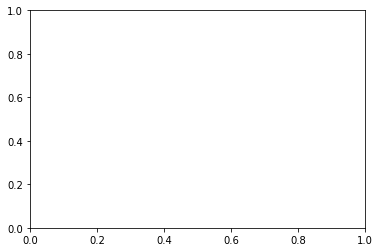

In [41]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred,color='blue')
plt.title("revenue vs reviews (test set)")
plt.xlabel('customer review')
plt.ylabel('revenue generated')
plt.show()